<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_6_DeepLearning/blob/main/Module7_DeepLearning_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/6_DeepLearning"

/content/gdrive/My Drive/Colab Notebooks/Reva/6_DeepLearning


# About Dataset

This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.


In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
from numpy import argmax

In [4]:
df = pd.read_csv('Amazon_Reviews.csv')

let's have a look at top 5 rows

In [5]:
df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Columns :
* ProductId - Unique identifier for the product
* UserId - Unique identifier for the user
* ProfileName - Profile name of User
* HelpfulnessNumerator - Num of users who found review helpful
* HelpfulnessDenomitaor - Number of users who indicated whether they found the review helpful or not
* Score - Rating between 1 to 5
* Time - Timestamp for the review
* Summary - Bried summary of the review
* Text - Text of the review

In [6]:
df.shape

(568454, 10)

We have 10 columns and 568454 rows in our dataframe. Let's check for null values, if there is any.

In [7]:
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

As we see, There are missing values in 'PROFILENAME' and 'SUMMARY' column.

Dropping null values.

In [8]:
df.dropna(inplace = True)
# checking columns
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
# checking info of the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 568411 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568411 non-null  int64 
 1   ProductId               568411 non-null  object
 2   UserId                  568411 non-null  object
 3   ProfileName             568411 non-null  object
 4   HelpfulnessNumerator    568411 non-null  int64 
 5   HelpfulnessDenominator  568411 non-null  int64 
 6   Score                   568411 non-null  int64 
 7   Time                    568411 non-null  int64 
 8   Summary                 568411 non-null  object
 9   Text                    568411 non-null  object
dtypes: int64(5), object(5)
memory usage: 47.7+ MB


In [10]:
df['Score'].value_counts()

5    363111
4     80655
1     52264
3     42638
2     29743
Name: Score, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


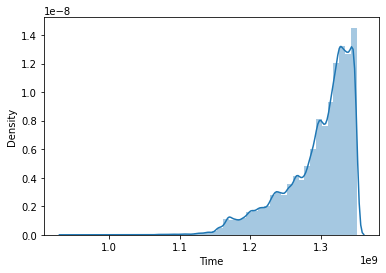

In [11]:
sns.distplot(df['Time'],bins = 50)

Highest reviews by ProfileName.

In [12]:
profilename = df['ProfileName'].value_counts().head(10)
profilename

C. F. Hill "CFH"                          451
O. Brown "Ms. O. Khannah-Brown"           421
Gary Peterson                             389
Rebecca of Amazon "The Rebecca Review"    365
Chris                                     363
Linda                                     290
John                                      261
Mike                                      260
c2                                        256
Laura                                     253
Name: ProfileName, dtype: int64

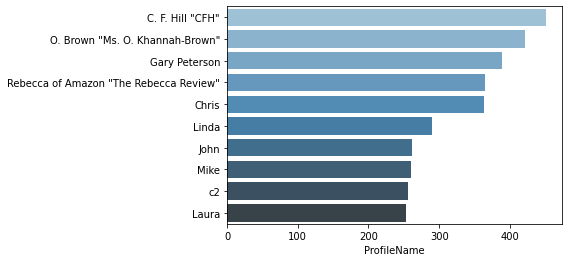

In [13]:
sns.barplot(y=profilename.index,x=profilename,palette='Blues_d')

Highest review contribution by ProfileName 

In [14]:
profile = df.groupby('ProfileName').filter(lambda x : len(x) > 300 )
len(profile)

1989

In [15]:
profilegroup = profile.groupby('ProfileName')['Score'].count()
profilegroup

ProfileName
C. F. Hill "CFH"                          451
Chris                                     363
Gary Peterson                             389
O. Brown "Ms. O. Khannah-Brown"           421
Rebecca of Amazon "The Rebecca Review"    365
Name: Score, dtype: int64

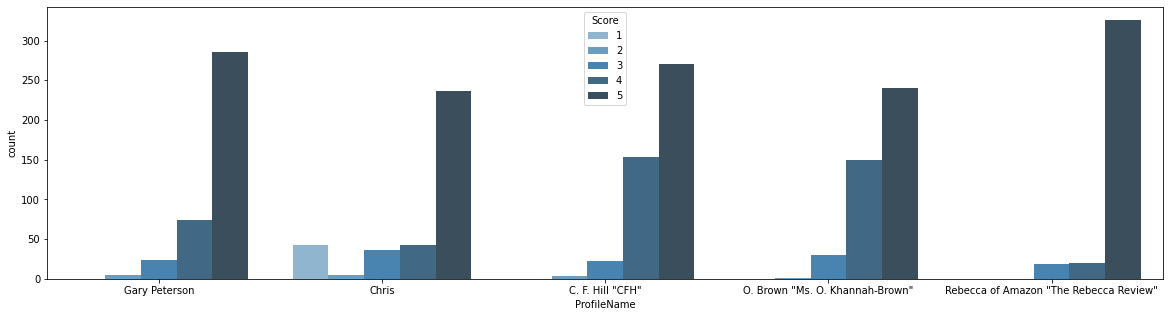

In [16]:
plt.figure(figsize = (20,5))
sns.countplot(x='ProfileName',hue = 'Score',data = profile,palette='Blues_d')

## Rating Score Count.

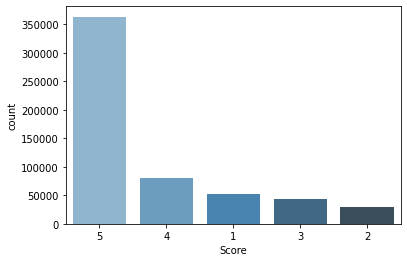

In [17]:
sns.countplot(x='Score',data = df,palette='Blues_d',order = df['Score'].value_counts().index)



*   5 rating score with highest 350000+ reviews, followed by 4 with approx 70000 reviews.
*   2 rating score with lowest count.




## Positive corealtion (HelpfulnessNumerator - HelpfulnessDenominator) 

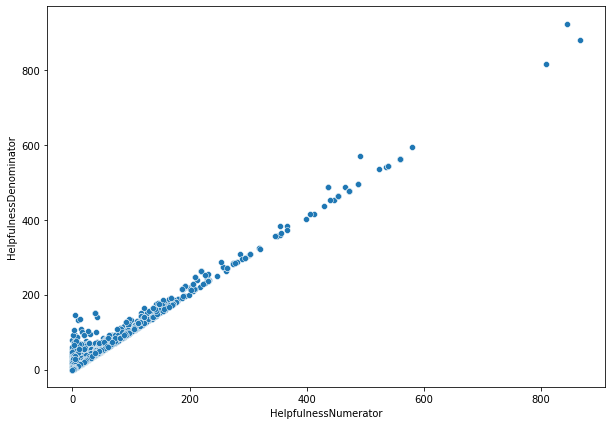

In [18]:
plt.figure(figsize = (10,7))
sns.scatterplot(data=df,x='HelpfulnessNumerator',y='HelpfulnessDenominator')

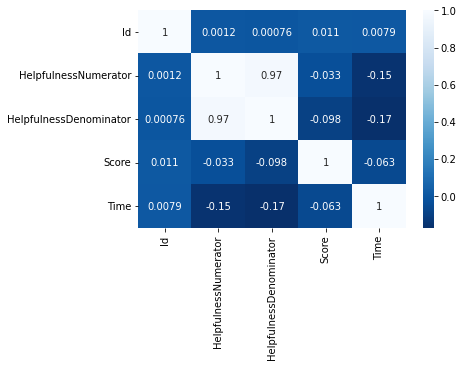

In [19]:
sns.heatmap(df.corr(),annot = True,cmap='Blues_r')

### Amazon Food Review Dataset using a zero shot model

In [20]:
!pip install transformers==3.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 884 kB 2.1 MB/s 
     |████████████████████████████████| 880 kB 24.7 MB/s 
     |████████████████████████████████| 3.0 MB 42.1 MB/s 
     |████████████████████████████████| 1.3 MB 40.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=4b48c8236100a4338a1df8420c1d022c5b29eb283c1cf1e9fff91a2f4b1c7ba0
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [21]:
from transformers import pipeline

In [22]:
classifier = pipeline("zero-shot-classification")

Downloading:   0%|          | 0.00/908 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/bart-large-mnli were not used when initializing BartForSequenceClassification: ['model.encoder.version', 'model.decoder.version']
- This IS expected if you are initializing BartForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing BartForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


The underlying model is trained on the task of Natural Language Inference (NLI), which takes in two sequences and determines whether they contradict each other, entail each other, or neither.

This can be adapted to the task of zero-shot classification by treating the sequence which we want to classify as one NLI sequence (called the premise) and turning a candidate label into the other (the hypothesis). If the model predicts that the constructed premise entails the hypothesis, then we can take that as a prediction that the label applies to the text. Check out this blog post for a more detailed explanation.

By default, the pipeline turns labels into hypotheses with the template This example is {class_name}.. This works well in many settings, but you can also customize this for your specific setting. Let's add another review to our above sentiment classification example that's a bit more challenging:

In [23]:
df = df.iloc[:50]

In [24]:
df.shape

(50, 10)

In [31]:
all_predicted_class = []
all_predicted_score = []

candidate_labels = ["Cartons", "Flexible", "Boxes", "Pallets", "Canned", "Bottled"]
candidate_results = [0, 0, 0, 0, 0, 0]

for sent in df['Text'].values:
    # To do multi-class classification, simply pass multi_class=True.
    # In this case, the scores will be independent, but each will fall between 0 and 1.
    res = classifier(sent, candidate_labels)

    SCORES = res["scores"]
    CLASSES = res["labels"]
    BEST_INDEX = argmax(SCORES)
    predicted_class = CLASSES[BEST_INDEX]
    predicted_score = SCORES[BEST_INDEX]

    all_predicted_class.append(predicted_class)
    all_predicted_score.append(predicted_score)    

    if predicted_class == 'Cartons' and predicted_score > 0.5:
        candidate_results[0] = candidate_results[0] + 1
    if predicted_class == 'Flexible' and predicted_score > 0.5:
        candidate_results[1] = candidate_results[1] + 1
    if predicted_class == 'Boxes' and predicted_score > 0.5:
        candidate_results[2] = candidate_results[2] + 1
    if predicted_class == 'Pallets' and predicted_score > 0.5:
        candidate_results[3] = candidate_results[3] + 1
    if predicted_class == 'Canned' and predicted_score > 0.5:
        candidate_results[4] = candidate_results[4] + 1
    if predicted_class == 'Bottled' and predicted_score > 0.5:
        candidate_results[5] = candidate_results[5] + 1

    if res['scores'][0] > 0.5:
        print(sent)
        print(res['labels'])
        print(res['scores'])
        print()


df["Class"] = all_predicted_class
df["Score"] = all_predicted_score
print(candidate_results)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.
['Canned', 'Flexible', 'Bottled', 'Pallets', 'Cartons', 'Boxes']
[0.9257684946060181, 0.02870950475335121, 0.02657620795071125, 0.007379482965916395, 0.0066796657629311085, 0.004886569455265999]

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".
['Flexible', 'Canned', 'Boxes', 'Bottled', 'Cartons', 'Pallets']
[0.7101731300354004, 0.08353815227746964, 0.06370311230421066, 0.058236200362443924, 0.05315844714641571, 0.031190985813736916]

This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tin

In [32]:
data = {'labels': candidate_labels,
        'values': candidate_results}

df_chart = pd.DataFrame(data, columns=['labels','values'])

df_chart.head(10)

,labels,values
0,Cartons,0
1,Flexible,37
2,Boxes,4
3,Pallets,0
4,Canned,1
5,Bottled,0


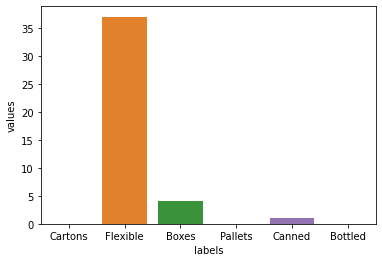

In [33]:
sns.barplot(data = df_chart
            ,x = 'labels'
            ,y = 'values')

## <font color="blue">Solution column for Amazon Food Review Dataset using a zero shot model</font>

In [34]:
df[['ProfileName','Text','Summary','Class','Score']]

,ProfileName,Text,Summary,Class,Score
0,delmartian,I have bought several of the Vitality canned d...,Good Quality Dog Food,Canned,0.925768
1,dll pa,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,Flexible,0.710173
2,"Natalia Corres ""Natalia Corres""",This is a confection that has been around a fe...,"""Delight"" says it all",Flexible,0.530927
3,Karl,If you are looking for the secret ingredient i...,Cough Medicine,Flexible,0.672466
4,"Michael D. Bigham ""M. Wassir""",Great taffy at a great price. There was a wid...,Great taffy,Flexible,0.590288
5,Twoapennything,I got a wild hair for taffy and ordered this f...,Nice Taffy,Flexible,0.392241
6,David C. Sullivan,This saltwater taffy had great flavors and was...,Great! Just as good as the expensive brands!,Flexible,0.737034
7,Pamela G. Williams,This taffy is so good. It is very soft and ch...,"Wonderful, tasty taffy",Flexible,0.574072
8,R. James,Right now I'm mostly just sprouting this so my...,Yay Barley,Flexible,0.865080
9,Carol A. Reed,This is a very healthy dog food. Good for thei...,Healthy Dog Food,Flexible,0.747098
